In [2]:
# ! wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, root_mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('jamb_exam_results.csv')

In [5]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [9]:
del df['student_id']

In [10]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [11]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [12]:
df.parent_education_level.unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [14]:
df.fillna(0, inplace=True)

In [15]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [16]:
df_full_train, df_test = train_test_split(df, random_state=1, test_size=0.2)
df_train, df_val = train_test_split(df_full_train, random_state=1, test_size=0.25)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score
y_val = df_val.jamb_score
y_test = df_test.jamb_score

In [18]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [19]:
dv = DictVectorizer(sparse=False)

In [20]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* **`study_hours_per_week`**
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

### Desicion Tree Regressor

In [21]:
dt = DecisionTreeRegressor(max_depth=1)

In [22]:
dt_model = dt.fit(X_train, y_train)

In [23]:
print(export_text(dt_model, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* 42.13
* 62.13
* 82.12

In [24]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [26]:
y_pred = rf.predict(X_val)

In [27]:
root_mean_squared_error(y_val, y_pred)

42.13724207871227

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [28]:
scores = []

for i in range(10, 201, 10):
    temp_rf = RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    temp_model = temp_rf.fit(X_train, y_train)
    y_pred_temp = temp_model.predict(X_val)
    scores.append((i, root_mean_squared_error(y_val, y_pred_temp)))

In [31]:
df_scores_result = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores_result[df_scores_result.n_estimators.isin([10,25,80,200])]

,n_estimators,rmse
0,10,42.137242
7,80,40.539333
19,200,40.601019


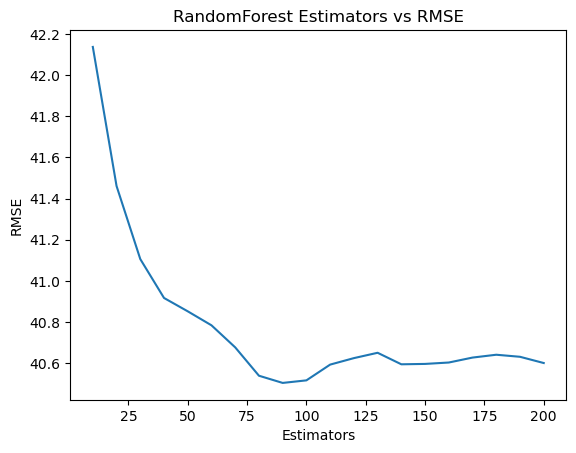

In [30]:
plt.plot(df_scores_result.n_estimators, df_scores_result.rmse)
plt.title('RandomForest Estimators vs RMSE')
plt.xlabel('Estimators')
plt.ylabel('RMSE')
plt.show()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [33]:
new_scores = []
for md in [10, 15, 20, 25]:
    for i in range(10, 201, 10):
        temp_rfr = RandomForestRegressor(n_estimators=i, max_depth=md, random_state=1, n_jobs=1)
        temp_model_rfr = temp_rfr.fit(X_train,y_train)
        y_pred_temp = temp_model_rfr.predict(X_val)
        new_scores.append((i, md, root_mean_squared_error(y_val, y_pred_temp)))

In [34]:
df_q4_scores = pd.DataFrame(new_scores, columns=['n_estimators', 'max_depth','rmse'])
df_q4_scores

,n_estimators,max_depth,rmse
0,10,10,41.258349
1,20,10,40.880528
2,30,10,40.624956
3,40,10,40.270069
4,50,10,40.317006
...,...,...,...
75,160,25,40.600208
76,170,25,40.624371
77,180,25,40.638564
78,190,25,40.628661


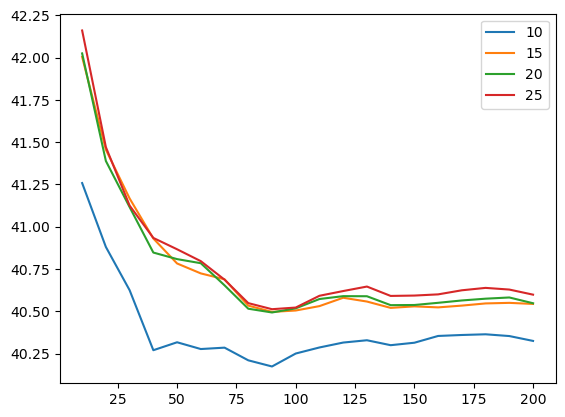

In [35]:
for d in [10, 15, 20, 25]:
    df_subset = df_q4_scores[df_q4_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [36]:
rf_q5 = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [37]:
rf_q5.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [38]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf_q5.feature_importances_
df_importances.sort_values('importance', ascending=False)

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [39]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [40]:
import xgboost as xgb

In [41]:
features = dv.get_feature_names_out()

In [43]:
features

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [44]:
features = [i.replace("=<", "_").replace("=","_") for i in features]

### Create DMatrix for train and validation

In [45]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

#### Create a watchlist

In [46]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [49]:
%%capture

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [48]:
#@ DEFINING THE FUNCTION: Taken from Notebook week 6
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [50]:
scores['eta=0.3'] = parse_xgb_output(output)

In [51]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,42.69552,44.86028
1,1,39.85005,43.06070
2,2,37.95285,41.83772
3,3,36.52203,41.26987
4,4,35.36066,41.02965
...,...,...,...
95,95,12.05464,44.31210
96,96,11.83129,44.35656
97,97,11.69930,44.40721
98,98,11.59889,44.42582
